## Importing the required packages


In [ ]:
!pip install pycaret
import pycaret
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 256kB 4.8MB/s 
     |████████████████████████████████| 1.6MB 13.6MB/s 
     |████████████████████████████████| 102kB 5.7MB/s 
     |████████████████████████████████| 65.8MB 59kB/s 
     |████████████████████████████████| 276kB 43.5MB/s 
     |████████████████████████████████| 245kB 44.3MB/s 
     |████████████████████████████████| 174kB 50.2MB/s 
     |████████████████████████████████| 14.2MB 345kB/s 
     |████████████████████████████████| 6.8MB 47.8MB/s 
     |████████████████████████████████| 1.8MB 41.9MB/s 
     |████████████████████████████████| 157.5MB 83kB/s 
     |████████████████████████████████| 2.1MB 34.0MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 58.0MB/s 
     |████████████████████████████████| 604kB 52.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
 

# Reading the data 


In [ ]:
data=pd.read_csv('All Loans without text - Step 1.csv')

FileNotFoundError: ignored

In [ ]:
data.head()

# Finding the ranges of income categories


In [ ]:
data['income_cat'].unique()

array([1, 2, 3])

In [ ]:
ranges={1:[],2:[],3:[]}
for i in range(1,4):
    df=data[data["income_cat"]==i]["annual_inc"]
    ranges[i].append(df.min())
    ranges[i].append(df.max())

In [ ]:
ranges
# It gives us the the catego to the range

{1: [1896, 100000], 2: [100005, 200000], 3: [200004, 6100000]}

# As we can see that the ranges are too huge therefore changing thr bins

cat-1:[0,100000]

cat-2:[100000,1000000]

cat-3:[5000000,1000000]

cat-4:

In [ ]:
bins=[-1,100000,1000000,5000000,10000000,20000000]
data['annual_cat']=pd.cut(data['annual_inc'],bins,labels=[1,2,3,4,5])


# As we now theee are few feattures which we do not now at the time of loan allocation like

1 Loss

2 Actual return

3 Expected return



In [ ]:
data.drop('Loss',axis=1,inplace=True)

In [ ]:
data.drop('Actual Return',axis=1,inplace=True)

In [ ]:
data.drop('Expected return ',axis=1,inplace=True)

In [ ]:
data.drop(['annual_inc','income_cat'],axis=1,inplace=True)

# The rate of intrest are divided into cats


In [ ]:
for i in range(1,3):
    d=data[data["interest_payment_cat"]==i]['interest_rate']
    print(d.min(),end=" ")
    print(d.max())

5.42 13.23
13.24 26.06


In [ ]:
data.drop('interest_payment_cat',axis=1,inplace=True)

In [ ]:
#bins=[0,300,600,800,1200,1500]
#labels=[0,1,2,3,4]
#data['installment12']=pd.cut(data["installment"],bins=[-1,300,600,800,1200,1500],labels=[0,1,2,3,4])
#data.drop('installment',axis=1,inplace=True)

## checking the correlation

In [ ]:
data.corr()

,emp_length_int,home_ownership_cat,loan_amount,term_cat,application_type_cat,purpose_cat,loan_condition_cat,interest_rate,grade_cat,installment,region
emp_length_int,1.000000,0.218940,0.141372,0.088820,NaN,-0.006953,-0.009881,0.031542,0.000168,0.125241,-0.002907
home_ownership_cat,0.218940,1.000000,0.206630,0.115965,NaN,0.009565,-0.047775,-0.105539,-0.109253,0.168144,-0.167186
loan_amount,0.141372,0.206630,1.000000,0.405478,NaN,-0.024817,0.022262,0.185483,0.156889,0.949701,-0.010040
term_cat,0.088820,0.115965,0.405478,1.000000,NaN,0.043247,0.089200,0.431207,0.428137,0.158403,-0.012966
application_type_cat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose_cat,-0.006953,0.009565,-0.024817,0.043247,NaN,1.000000,0.023956,0.059153,0.073166,-0.036609,-0.003050
loan_condition_cat,-0.009881,-0.047775,0.022262,0.089200,NaN,0.023956,1.000000,0.177257,0.184625,0.016923,0.003068
interest_rate,0.031542,-0.105539,0.185483,0.431207,NaN,0.059153,0.177257,1.000000,0.935611,0.171447,-0.010188
grade_cat,0.000168,-0.109253,0.156889,0.428137,NaN,0.073166,0.184625,0.935611,1.000000,0.136643,-0.001351
installment,0.125241,0.168144,0.949701,0.158403,NaN,-0.036609,0.016923,0.171447,0.136643,1.000000,-0.007280


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
data.drop(171528,axis=0,inplace=True)

In [ ]:
target=data['loan_condition_cat']
data.drop('loan_condition_cat',axis=1,inplace=True)

In [ ]:
sm = SMOTE(random_state = 2)
y=target.values
X=data[:].values
y=y.reshape(-1, 1)
print(X.shape,y.shape)
X,y=sm.fit_sample(X, y.ravel())
print(X.shape,y.shape)

(171528, 11) (171528, 1)
(295754, 11) (295754,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

In [ ]:
df=pd.DataFrame(X,columns=data.columns)

In [ ]:
df

,emp_length_int,home_ownership_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_rate,grade_cat,installment,region,annual_cat
0,10.000000,1.000000,5000.0,1.0,1.0,1.000000,10.650000,2.000000,162.870000,1.000000,1.0
1,0.500000,1.000000,2500.0,2.0,1.0,2.000000,15.270000,3.000000,59.830000,2.000000,1.0
2,10.000000,1.000000,2400.0,1.0,1.0,3.000000,15.960000,3.000000,84.330000,3.000000,1.0
3,10.000000,1.000000,10000.0,1.0,1.0,4.000000,13.490000,3.000000,339.310000,4.000000,1.0
4,1.000000,1.000000,3000.0,2.0,1.0,4.000000,12.690000,2.000000,67.790000,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
295749,9.397416,3.000000,15000.0,1.0,1.0,5.205167,17.760000,4.000000,540.490000,2.602584,1.0
295750,8.658656,1.829328,16500.0,1.0,1.0,6.000000,15.869715,4.487983,579.056996,5.000000,1.0
295751,5.834115,2.668230,3000.0,1.0,1.0,6.000000,16.029297,3.000000,105.520627,2.000000,1.0
295752,3.757197,1.216342,14075.0,2.0,1.0,1.540855,16.478203,3.000000,345.899779,2.324513,1.0


In [ ]:
scale=StandardScaler()
x=scale.fit_transform(X)

In [ ]:
pca=PCA(n_components=11)

In [ ]:
pca.fit(x)

PCA(n_components=11)

In [ ]:
x1=pca.transform(x)

In [ ]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

In [ ]:
cum_exp_var

[0.2781185961786142,
 0.4664823960139765,
 0.5828670156085283,
 0.6824549108875899,
 0.7808541184978229,
 0.859013695749861,
 0.9336077430926271,
 0.9925672995664128,
 0.9987724783027002,
 0.9999999999999998,
 0.9999999999999998]

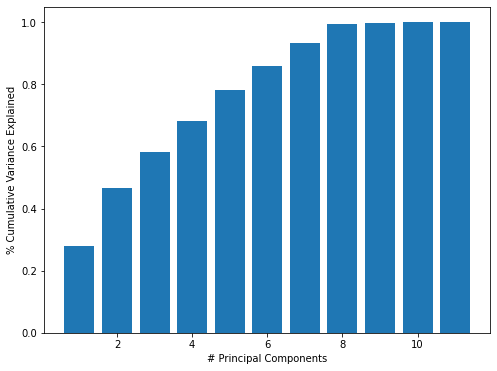

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,9+3), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [ ]:
df['target']=y

In [ ]:
import pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
model_setup = setup(data=df, target='target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(295754, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:06:46
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9119,0.9432,0.8258,0.9978,0.9037,0.8238,0.8364,30.976
lightgbm,Light Gradient Boosting Machine,0.9108,0.9427,0.8219,0.9999,0.9022,0.8217,0.8350,2.235
rf,Random Forest Classifier,0.9041,0.9456,0.8484,0.9549,0.8985,0.8081,0.8132,32.093
et,Extra Trees Classifier,0.9009,0.9436,0.8611,0.9359,0.8969,0.8019,0.8045,23.962
gbc,Gradient Boosting Classifier,0.8839,0.9308,0.7707,0.9965,0.8692,0.7679,0.7884,31.593
dt,Decision Tree Classifier,0.8555,0.8566,0.8595,0.8530,0.8562,0.7110,0.7110,1.115
ada,Ada Boost Classifier,0.8430,0.9100,0.7839,0.8893,0.8333,0.6860,0.6909,7.371
knn,K Neighbors Classifier,0.7557,0.8360,0.8882,0.7024,0.7845,0.5113,0.5302,3.278
nb,Naive Bayes,0.6296,0.6793,0.6378,0.6281,0.6329,0.2593,0.2593,0.150
ridge,Ridge Classifier,0.6160,0.0000,0.6166,0.6164,0.6165,0.2321,0.2321,0.149


In [ ]:
print(best_model)

In [ ]:
model=create_model('xgboost')

In [ ]:
tuned_rf=tune_model(model)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:49:30
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.8min


In [ ]:
print("hey")